# 1. Load Data

In [1]:
import numpy as np
import torch
import random

seed = 42
np.random.seed(seed)
torch.manual_seed(seed)
random.seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

DATA_PATH = "../Gomoku/gomoku_dataset_split/"

# 棋盘状态 (N, 15, 15)
train_board_states = np.load(DATA_PATH + '/train/full_board/board_states.npy')
print('board_states shape:', train_board_states.shape)

# 下一个落子坐标 (N, 2)
train_next_moves_coords = np.load(DATA_PATH + '/train/full_board/next_moves_coords.npy')
print('next_moves_coords shape:', train_next_moves_coords.shape)

# 下一个落子玩家 (N,)
train_next_moves_players = np.load(DATA_PATH + '/train/full_board/next_moves_players.npy')
print('next_moves_players shape:', train_next_moves_players.shape)

# 棋盘状态 (N, 15, 15)
test_board_states = np.load(DATA_PATH + '/test/full_board/board_states.npy')
print('board_states shape:', test_board_states.shape)

# 下一个落子坐标 (N, 2)
test_next_moves_coords = np.load(DATA_PATH + '/test/full_board/next_moves_coords.npy')
print('next_moves_coords shape:', test_next_moves_coords.shape)

# 下一个落子玩家 (N,)
test_next_moves_players = np.load(DATA_PATH + '/test/full_board/next_moves_players.npy')
print('next_moves_players shape:', test_next_moves_players.shape)

board_states shape: (20921, 15, 15)
next_moves_coords shape: (20921, 2)
next_moves_players shape: (20921,)
board_states shape: (5457, 15, 15)
next_moves_coords shape: (5457, 2)
next_moves_players shape: (5457,)


In [2]:
# 示例：展示第i步
for i in range(12394, 12399):
    print('='*30)
    print(f'第{i}步棋盘:')
    print(train_board_states[i])
    print(f'第{i+1}步落子坐标:', train_next_moves_coords[i])
    print(f'第{i+1}步落子玩家:', train_next_moves_players[i])
    print(f'第{i+1}步落子玩家: col={train_next_moves_coords[i][0]}, row={train_next_moves_coords[i][1]}')
    print('='*30)

第12394步棋盘:
[[ 0  0  1  0 -1  1  1 -1  1 -1  1  0  0 -1  0]
 [ 1 -1  1  0  1  0 -1 -1  1 -1  1  1  1  1 -1]
 [ 0  0  0 -1  1  0 -1  1 -1 -1  0  1 -1 -1 -1]
 [-1  1 -1  1 -1 -1 -1  1  1 -1  1 -1  1  0  1]
 [-1 -1 -1  1 -1  1 -1  1  1  1 -1  1  0  1  0]
 [-1  1  1  1  1 -1  1 -1 -1  1 -1  1  0  1 -1]
 [ 1  1 -1 -1 -1  1 -1  1  0  1 -1 -1 -1 -1  1]
 [ 0  1 -1  1 -1  1  1  1 -1  1  1  0 -1 -1  0]
 [-1 -1 -1  1 -1  1 -1 -1  1 -1 -1  1  1 -1 -1]
 [ 0  1  1 -1  1  1  1 -1  0  1  1  0 -1  1  1]
 [ 1  1 -1 -1 -1 -1  1  1 -1  1  1 -1  1 -1  1]
 [ 0 -1  0 -1  1  1  0 -1 -1  1  1 -1  1  0 -1]
 [ 1  0 -1  1 -1  1 -1 -1 -1  1 -1 -1  1  0  0]
 [-1 -1  1 -1 -1  1  0  0  1 -1 -1  1  0  1  1]
 [ 1 -1  0  0 -1  0  1  0  0 -1 -1  1 -1  0  0]]
第12395步落子坐标: [ 2 14]
第12395步落子玩家: 1
第12395步落子玩家: col=2, row=14
第12395步棋盘:
[[ 0  0  1  0 -1  1  1 -1  1 -1  1  0  0 -1  0]
 [ 1 -1  1  0  1  0 -1 -1  1 -1  1  1  1  1 -1]
 [ 0  0  0 -1  1  0 -1  1 -1 -1  0  1 -1 -1 -1]
 [-1  1 -1  1 -1 -1 -1  1  1 -1  1 -1  1  0  1]
 [

# 2. Process Data

In [3]:
import pandas as pd

# 合并为DataFrame，每行一个样本，包含棋盘和玩家
train_df = pd.DataFrame({
    'board_state': list(train_board_states),
    'next_moves_player': train_next_moves_players
})
train_df

,board_state,next_moves_player
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",-1
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",1
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",-1
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",1
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",-1
...,...,...
20916,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",-1
20917,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",1
20918,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",-1
20919,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",1


In [4]:
# next_moves_coords处理y成one-hot编码
# 假设棋盘为15x15，坐标为(x, y)，将其转为one-hot向量，长度225

def coords_to_onehot(coords, board_size=15):
    # coords: (N, 2)
    N = coords.shape[0]
    onehot = np.zeros((N, board_size * board_size), dtype=np.int32)
    for i, (col, row) in enumerate(coords):
        idx = row * board_size + col
        onehot[i, idx] = 1
    return onehot

# 处理后的y
train_y_onehot = coords_to_onehot(train_next_moves_coords)
print('y_onehot shape:', train_y_onehot.shape)
print('原第一个样本的数据:', train_next_moves_coords[0])
print('转换后第一个样本的one-hot:', train_y_onehot[0])
print('转换后第一个样本的index:', np.argmax(train_y_onehot[0]))

y_onehot shape: (20921, 225)
原第一个样本的数据: [7 8]
转换后第一个样本的one-hot: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
转换后第一个样本的index: 127


In [5]:
# 同样处理测试集
test_df = pd.DataFrame({
    'board_state': list(test_board_states),
    'next_moves_player': test_next_moves_players
})
test_y_onehot = coords_to_onehot(test_next_moves_coords)
print('测试集y_onehot shape:', test_y_onehot.shape)

测试集y_onehot shape: (5457, 225)


In [6]:
# 数据预处理：将棋盘状态展开为一维向量
def preprocess_X(df):
    board_flat = np.array([x.flatten() for x in df['board_state']])  # (N, 225)
    player = df['next_moves_player'].values.reshape(-1, 1)  # (N, 1)
    X = np.concatenate([player, board_flat], axis=1)  # (N, 226)
    return X


# 使用预处理结果
train_X_np = preprocess_X(train_df)
train_y_np = train_y_onehot

test_X_np = preprocess_X(test_df)
test_y_np = test_y_onehot

In [7]:
print('训练集X shape:', train_X_np.shape)
print('训练集y shape:', train_y_np.shape)
print('测试集X shape:', test_X_np.shape)
print('测试集y shape:', test_y_np.shape)

训练集X shape: (20921, 226)
训练集y shape: (20921, 225)
测试集X shape: (5457, 226)
测试集y shape: (5457, 225)


In [8]:
import torch

def check_legal_moves(X_np, y_onehot):
    # X: (N, 226) = [player, board_flat(225)]
    # y_onehot: (N,225)
    X = torch.tensor(X_np, dtype=torch.float32)
    y_idx = torch.tensor(y_onehot).argmax(dim=1)

    board_flat = X[:, 1:]
    mask = (board_flat == 0)  # True=空位

    # 检查目标是否在合法位置，比例越接近1，说明下到非法位置的走法越多，会导致训练期mask爆炸
    legal_target = mask.gather(1, y_idx.unsqueeze(1)).squeeze(1)
    illegal_ratio = (~legal_target).float().mean().item()
    print('目标落在非空位的样本占比:', illegal_ratio)
    return legal_target

train_legal_target = check_legal_moves(train_X_np, train_y_onehot)
test_legal_target = check_legal_moves(test_X_np, test_y_np)

目标落在非空位的样本占比: 0.00028679316164925694
目标落在非空位的样本占比: 0.0005497526144608855


In [9]:
# 打印所有非法样本的下标和棋盘
train_illegal_indices = (~train_legal_target).nonzero(as_tuple=True)[0].tolist()
test_illegal_indices = (~test_legal_target).nonzero(as_tuple=True)[0].tolist()
print('训练集训练集非法样本下标:', train_illegal_indices)
print('测试集非法样本下标:', test_illegal_indices)
for idx in train_illegal_indices:
    print(f'训练集样本 {idx} 的棋盘:')
    print(train_board_states[idx])
    print(f'目标落子坐标:', train_next_moves_coords[idx])
    print('-'*40)
for idx in test_illegal_indices:
    print(f'测试集样本 {idx} 的棋盘:')
    print(test_board_states[idx])
    print(f'目标落子坐标:', test_next_moves_coords[idx])
    print('-'*40)

训练集训练集非法样本下标: [12395, 12397, 12399, 19536, 19538, 19540]
测试集非法样本下标: [3452, 3454, 3456]
训练集样本 12395 的棋盘:
[[ 0  0  1  0 -1  1  1 -1  1 -1  1  0  0 -1  0]
 [ 1 -1  1  0  1  0 -1 -1  1 -1  1  1  1  1 -1]
 [ 0  0  0 -1  1  0 -1  1 -1 -1  0  1 -1 -1 -1]
 [-1  1 -1  1 -1 -1 -1  1  1 -1  1 -1  1  0  1]
 [-1 -1 -1  1 -1  1 -1  1  1  1 -1  1  0  1  0]
 [-1  1  1  1  1 -1  1 -1 -1  1 -1  1  0  1 -1]
 [ 1  1 -1 -1 -1  1 -1  1  0  1 -1 -1 -1 -1  1]
 [ 0  1 -1  1 -1  1  1  1 -1  1  1  0 -1 -1  0]
 [-1 -1 -1  1 -1  1 -1 -1  1 -1 -1  1  1 -1 -1]
 [ 0  1  1 -1  1  1  1 -1  0  1  1  0 -1  1  1]
 [ 1  1 -1 -1 -1 -1  1  1 -1  1  1 -1  1 -1  1]
 [ 0 -1  0 -1  1  1  0 -1 -1  1  1 -1  1  0 -1]
 [ 1  0 -1  1 -1  1 -1 -1 -1  1 -1 -1  1  0  0]
 [-1 -1  1 -1 -1  1  0  0  1 -1 -1  1  0  1  1]
 [ 1 -1  1  0 -1  0  1  0  0 -1 -1  1 -1  0  0]]
目标落子坐标: [ 2 14]
----------------------------------------
训练集样本 12397 的棋盘:
[[ 0  0  1  0 -1  1  1 -1  1 -1  1  0  0 -1  0]
 [ 1 -1  1  0  1  0 -1 -1  1 -1  1  1  1  1 -1]
 [ 0 

In [10]:
# 移除非法样本
train_valid_mask = train_legal_target.numpy()  # True=合法，False=非法
train_X_np = train_X_np[train_valid_mask]
train_y_onehot = train_y_onehot[train_valid_mask]
print('移除后训练集X shape:', train_X_np.shape)
print('移除后训练集y shape:', train_y_onehot.shape)
test_valid_mask = test_legal_target.numpy()  # True=合法，False=非法
test_X_np = test_X_np[test_valid_mask]
test_y_onehot = test_y_onehot[test_valid_mask]
print('移除后测试集X shape:', test_X_np.shape)
print('移除后测试集y shape:', test_y_onehot.shape)

# 再次进行检查
check_legal_moves(train_X_np, train_y_onehot)
check_legal_moves(test_X_np, test_y_onehot)

# 检查数据量
train_y_np = train_y_onehot
test_y_np = test_y_onehot
print('最终训练集样本数:', train_X_np.shape[0])
print('最终训练集标签数:', train_y_np.shape[0])
print('最终测试集样本数:', test_X_np.shape[0])
print('最终测试集标签数:', test_y_np.shape[0])

移除后训练集X shape: (20915, 226)
移除后训练集y shape: (20915, 225)
移除后测试集X shape: (5454, 226)
移除后测试集y shape: (5454, 225)
目标落在非空位的样本占比: 0.0
目标落在非空位的样本占比: 0.0
最终训练集样本数: 20915
最终训练集标签数: 20915
最终测试集样本数: 5454
最终测试集标签数: 5454


# 3. Define Neural Network

In [11]:
# 用PyTorch定义一个带残差的简化CNN神经网络模型
import torch
import torch.nn as nn
import torch.nn.functional as F

class ResidualCNNNet(nn.Module):
    def __init__(self, input_channels=2, board_size=15, output_dim=225):
        super(ResidualCNNNet, self).__init__()
        self.conv1 = nn.Conv2d(input_channels, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.dropout = nn.Dropout(0.1)
        self.res_conv = nn.Conv2d(input_channels, 64, kernel_size=1)
        self.fc = nn.Linear(board_size * board_size * 64, output_dim)
    def forward(self, x):
        # x: (batch, 226) -> (batch, 2, 15, 15)
        player = x[:, 0].unsqueeze(1).unsqueeze(2).unsqueeze(3).repeat(1, 1, 15, 15)
        board = x[:, 1:].reshape(-1, 1, 15, 15)
        x_cnn = torch.cat([player, board], dim=1)
        out = F.relu(self.bn1(self.conv1(x_cnn)))
        out = F.relu(self.bn2(self.conv2(out)))
        out = F.relu(self.bn3(self.conv3(out)))
        out = self.dropout(out)
        # 残差连接
        res = self.res_conv(x_cnn)
        out = out + res
        out = out.view(out.size(0), -1)
        logits = self.fc(out)  # (batch, 225)
        # mask非法落子
        board_flat = x[:, 1:]
        mask = (board_flat == 0)
        logits = logits.masked_fill(~mask, -1e9)
        return logits

# 实例化模型
model = ResidualCNNNet()
print(model)

ResidualCNNNet(
  (conv1): Conv2d(2, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (res_conv): Conv2d(2, 64, kernel_size=(1, 1), stride=(1, 1))
  (fc): Linear(in_features=14400, out_features=225, bias=True)
)


# 4. Validation Before Training

In [12]:
# 转换数据为torch.Tensor
train_X_tensor = torch.tensor(train_X_np, dtype=torch.float32)
train_y_tensor = torch.tensor(train_y_np, dtype=torch.float32)
train_output = model(train_X_tensor)

# 转换数据为torch.Tensor
test_X_tensor = torch.tensor(test_X_np, dtype=torch.float32)
test_y_tensor = torch.tensor(test_y_np, dtype=torch.float32)
test_output = model(test_X_tensor)

In [13]:
# 计算损失和准确率所用的目标应为类别索引（0..224）而非one-hot
# 将 one-hot 转为索引，避免在 CrossEntropyLoss 中传入浮点 one-hot
train_target_idx = train_y_tensor.argmax(dim=1).long()
test_target_idx = test_y_tensor.argmax(dim=1).long()

loss_fn = nn.CrossEntropyLoss()
train_loss = loss_fn(train_output, train_target_idx)
test_loss = loss_fn(test_output, test_target_idx)
print(f"训练前训练集损失: {train_loss.item():.4f}")
print(f"训练前测试集损失: {test_loss.item():.4f}")

# 计算准确率（与前一致）
train_pred_idx = train_output.argmax(dim=1)
train_true_idx = train_target_idx
train_acc = (train_pred_idx == train_true_idx).float().mean().item()
print(f"训练前训练集准确率: {train_acc*100:.2f}%")

test_pred_idx = test_output.argmax(dim=1)
test_true_idx = test_target_idx
test_acc = (test_pred_idx == test_true_idx).float().mean().item()
print(f"训练前测试集准确率: {test_acc*100:.2f}%")

训练前训练集损失: 5.4748
训练前测试集损失: 5.4615
训练前训练集准确率: 0.28%
训练前测试集准确率: 0.33%


# 5. Training

Epoch 1/30, Train Loss: 5.2216, Val Loss: 4.1261, Train Acc: 8.11%, Val Acc: 11.95%
Epoch 2/30, Train Loss: 3.3205, Val Loss: 3.1344, Train Acc: 21.63%, Val Acc: 25.67%
Epoch 3/30, Train Loss: 2.5629, Val Loss: 2.8318, Train Acc: 34.78%, Val Acc: 34.80%
Epoch 4/30, Train Loss: 2.0371, Val Loss: 2.6204, Train Acc: 45.95%, Val Acc: 41.68%
Epoch 5/30, Train Loss: 1.6501, Val Loss: 2.4907, Train Acc: 55.11%, Val Acc: 46.46%
Epoch 6/30, Train Loss: 1.3620, Val Loss: 2.4395, Train Acc: 62.21%, Val Acc: 50.29%
Epoch 7/30, Train Loss: 1.1629, Val Loss: 2.4309, Train Acc: 67.54%, Val Acc: 53.20%
Epoch 8/30, Train Loss: 1.0012, Val Loss: 2.4061, Train Acc: 71.90%, Val Acc: 54.68%
Epoch 9/30, Train Loss: 0.8754, Val Loss: 2.4842, Train Acc: 75.67%, Val Acc: 54.68%
Epoch 10/30, Train Loss: 0.7681, Val Loss: 2.4873, Train Acc: 78.06%, Val Acc: 55.35%
Epoch 11/30, Train Loss: 0.6910, Val Loss: 2.3932, Train Acc: 80.43%, Val Acc: 56.88%
Epoch 12/30, Train Loss: 0.6478, Val Loss: 2.5036, Train Acc: 82

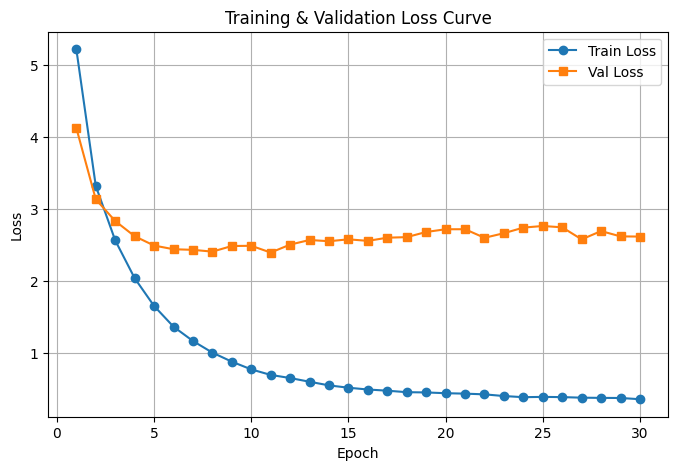

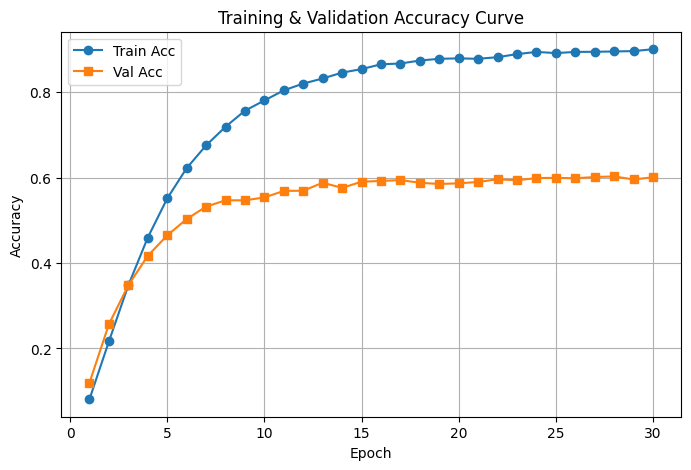

In [14]:
# 训练时拆分验证集，并同时画训练和验证损失曲线、准确率曲线
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 注意：CrossEntropyLoss 需要整型类别索引作为目标
# 因此将 y 的 one-hot 转换为类别索引后再拆分
all_X = train_X_tensor
all_y_idx = train_y_tensor.argmax(dim=1).long()

X_train, X_val, y_train_idx, y_val_idx = train_test_split(all_X, all_y_idx, test_size=0.1, random_state=42)

num_epochs = 30
batch_size = 64
learning_rate = 0.001

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

train_dataset = torch.utils.data.TensorDataset(X_train, y_train_idx)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = torch.utils.data.TensorDataset(X_val, y_val_idx)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

train_loss_list = []
val_loss_list = []
train_acc_list = []
val_acc_list = []

for epoch in range(num_epochs):
    # 训练
    model.train()
    total_train_loss = 0
    correct_train = 0
    total_train = 0
    for batch_X, batch_y_idx in train_loader:
        optimizer.zero_grad()
        output = model(batch_X)
        loss = loss_fn(output, batch_y_idx)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item() * batch_X.size(0)
        # 计算准确率
        pred_idx = output.argmax(dim=1)
        correct_train += (pred_idx == batch_y_idx).sum().item()
        total_train += batch_X.size(0)
    avg_train_loss = total_train_loss / len(train_loader.dataset)
    train_loss_list.append(avg_train_loss)
    train_acc_list.append(correct_train / total_train)

    # 验证
    model.eval()
    total_val_loss = 0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for batch_X, batch_y_idx in val_loader:
            output = model(batch_X)
            loss = loss_fn(output, batch_y_idx)
            total_val_loss += loss.item() * batch_X.size(0)
            pred_idx = output.argmax(dim=1)
            correct_val += (pred_idx == batch_y_idx).sum().item()
            total_val += batch_X.size(0)
    avg_val_loss = total_val_loss / len(val_loader.dataset)
    val_loss_list.append(avg_val_loss)
    val_acc_list.append(correct_val / total_val)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, Train Acc: {train_acc_list[-1]*100:.2f}%, Val Acc: {val_acc_list[-1]*100:.2f}%")

# 绘制训练和验证损失曲线
plt.figure(figsize=(8,5))
plt.plot(range(1, num_epochs+1), train_loss_list, marker='o', label='Train Loss')
plt.plot(range(1, num_epochs+1), val_loss_list, marker='s', label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

# 绘制训练和验证准确率曲线
plt.figure(figsize=(8,5))
plt.plot(range(1, num_epochs+1), train_acc_list, marker='o', label='Train Acc')
plt.plot(range(1, num_epochs+1), val_acc_list, marker='s', label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy Curve')
plt.legend()
plt.grid(True)
plt.show()

# 6. Validation After Traning

In [15]:
# 训练后再计算一次训练集和测试集损失
model.eval()
with torch.no_grad():
    train_output = model(train_X_tensor)
    test_output = model(test_X_tensor)

# 与 CrossEntropyLoss 配套使用类别索引
after_train_train_target_idx = train_y_tensor.argmax(dim=1).long()
after_train_test_target_idx = test_y_tensor.argmax(dim=1).long()

train_loss = loss_fn(train_output, after_train_train_target_idx)
test_loss = loss_fn(test_output, after_train_test_target_idx)
print(f"训练后训练集损失: {train_loss.item():.4f}")
print(f"训练后测试集损失: {test_loss.item():.4f}")

# 计算准确率
train_pred_idx = train_output.argmax(dim=1)
train_true_idx = after_train_train_target_idx
train_acc = (train_pred_idx == train_true_idx).float().mean().item()
print(f"训练后训练集准确率: {train_acc*100:.2f}%")

test_pred_idx = test_output.argmax(dim=1)
test_true_idx = after_train_test_target_idx
test_acc = (test_pred_idx == test_true_idx).float().mean().item()
print(f"训练后测试集准确率: {test_acc*100:.2f}%")

训练后训练集损失: 0.5181
训练后测试集损失: 2.9768
训练后训练集准确率: 88.37%
训练后测试集准确率: 53.87%


# 7. Visualization

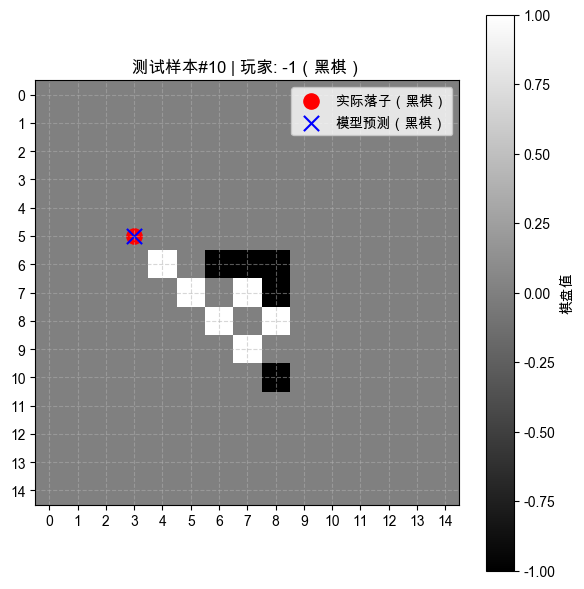

实际落子坐标: (row=5, col=3)，黑棋下棋
模型预测落子坐标: (row=5, col=3)，预测为黑棋下棋
预测正确！


In [16]:
# 选取一个测试样本进行可视化、解读、预测与对比
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager

plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'STHeiti', 'Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# 选某个测试样本
idx = 10
sample_X = test_X_np[idx]  # shape: (226,)
sample_y = test_y_np[idx]  # shape: (225,)

# 还原棋盘状态和玩家
player = int(sample_X[0])
board_flat = sample_X[1:]
board = board_flat.reshape(15, 15)

# 解读实际落子坐标（注意：one-hot编码使用 idx = x*15 + y）
actual_move_idx = sample_y.argmax()
actual_row, actual_col = divmod(actual_move_idx, 15)  # 还原为 (x, y)

# 用模型预测（推理阶段加mask）
model.eval()
with torch.no_grad():
    pred_logits = model(torch.tensor(sample_X, dtype=torch.float32).unsqueeze(0))  # shape: (1, 225)
    # mask非法落子
    mask = (board_flat == 0)  # 合法落子为0
    masked_logits = pred_logits.clone()
    masked_logits[0][~mask] = -1e9
    pred_move_idx = masked_logits.squeeze().argmax().item()
    pred_row, pred_col = divmod(pred_move_idx, 15)  # (y, x)

# 判断当前玩家颜色
player_label = '白棋' if player == 1 else '黑棋'

# 可视化棋盘+标注实际和预测落子，纵轴从下到上从小到大
plt.figure(figsize=(6,6))
plt.imshow(board, cmap='gray', interpolation='none', vmin=-1, vmax=1)
plt.title(f'测试样本#{idx} | 玩家: {player}（{player_label}）')
plt.colorbar(label='棋盘值')

# 标注实际落子与预测落子（imshow坐标系：横轴为列y，纵轴为行x）
plt.scatter(actual_col, actual_row, c='red', s=120, marker='o', label=f'实际落子（{player_label}）')
plt.scatter(pred_col, pred_row,  c='blue', s=120, marker='x', label=f'模型预测（{player_label}）')

plt.legend(loc='upper right')
plt.xticks(np.arange(0, 15))
plt.yticks(np.arange(0, 15))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print(f'实际落子坐标: (row={actual_row}, col={actual_col})，{player_label}下棋')
print(f'模型预测落子坐标: (row={pred_row}, col={pred_col})，预测为{player_label}下棋')
print('预测正确！' if (actual_col, actual_row) == (pred_col, pred_row) else '预测错误。')

# 8. Save Model

In [17]:
# 保存模型参数到文件
model_save_path = 'cnn_model.pth'
torch.save(model.state_dict(), model_save_path)
print(f'模型已保存到 {model_save_path}')

模型已保存到 cnn_model.pth


# 9. Manual Test

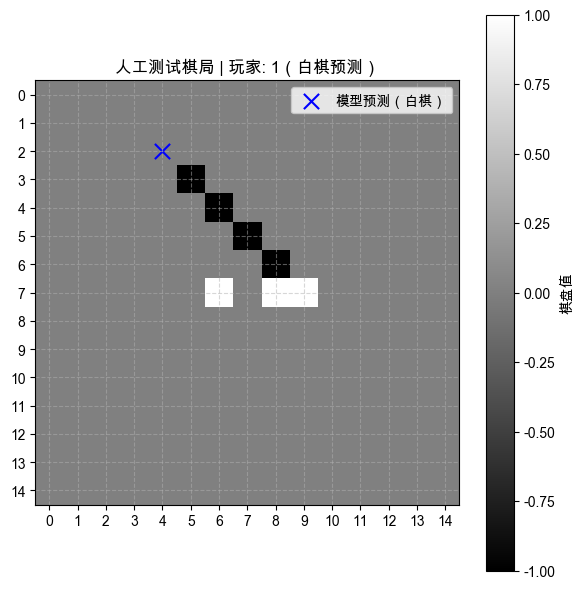

模型预测落子坐标: (row=2, col=4)，为白棋下棋进行预测


In [18]:
# 用指定棋局和玩家进行模型预测和可视化
import matplotlib.pyplot as plt
import numpy as np

player = 1
board = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
])

# 构造输入特征
sample_X = np.concatenate([[player], board.flatten()])

# 用模型预测（模型内部会基于原始输入自动mask非法落子）
model.eval()
with torch.no_grad():
    pred_logits = model(torch.tensor(sample_X, dtype=torch.float32).unsqueeze(0))  # shape: (1, 225)
    pred_move_idx = pred_logits.squeeze().argmax().item()
    pred_row, pred_col = divmod(pred_move_idx, 15)  # (y, x)

# 判断当前玩家颜色
player_label = '白棋' if player == 1 else '黑棋'

# 可视化棋盘+标注预测落子
plt.figure(figsize=(6,6))
plt.imshow(board, cmap='gray', interpolation='none', vmin=-1, vmax=1)
plt.title(f'人工测试棋局 | 玩家: {player}（{player_label}预测）')
plt.colorbar(label='棋盘值')
plt.scatter(pred_col, pred_row, c='blue', s=120, marker='x', label=f'模型预测（{player_label}）')
plt.legend(loc='upper right')
plt.xticks(np.arange(0, 15))
plt.yticks(np.arange(0, 15))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print(f'模型预测落子坐标: (row={pred_row}, col={pred_col})，为{player_label}下棋进行预测')

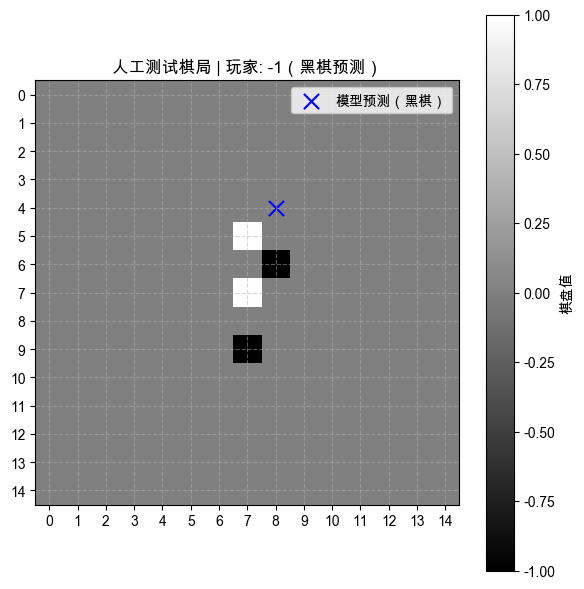

模型预测落子坐标: (row=4, col=8)，为黑棋下棋进行预测


In [19]:
# 用指定棋局和玩家进行模型预测和可视化
import matplotlib.pyplot as plt
import numpy as np

player = -1
board = np.array(
     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
)

# 构造输入特征
sample_X = np.concatenate([[player], board.flatten()])

# 用模型预测（模型内部会基于原始输入自动mask非法落子）
model.eval()
with torch.no_grad():
    pred_logits = model(torch.tensor(sample_X, dtype=torch.float32).unsqueeze(0))  # shape: (1, 225)
    pred_move_idx = pred_logits.squeeze().argmax().item()
    pred_row, pred_col = divmod(pred_move_idx, 15)  # (y, x)

# 判断当前玩家颜色
player_label = '白棋' if player == 1 else '黑棋'

# 可视化棋盘+标注预测落子
plt.figure(figsize=(6,6))
plt.imshow(board, cmap='gray', interpolation='none', vmin=-1, vmax=1)
plt.title(f'人工测试棋局 | 玩家: {player}（{player_label}预测）')
plt.colorbar(label='棋盘值')
plt.scatter(pred_col, pred_row, c='blue', s=120, marker='x', label=f'模型预测（{player_label}）')
plt.legend(loc='upper right')
plt.xticks(np.arange(0, 15))
plt.yticks(np.arange(0, 15))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print(f'模型预测落子坐标: (row={pred_row}, col={pred_col})，为{player_label}下棋进行预测')

# 10.RL


In [20]:
import numpy as np
import torch
import torch.nn.functional as F
from torch.distributions import Categorical
import copy
import random
from typing import Tuple

# ===== 0) 模型与设备 =====
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
policy_model = model

try:
    policy_model  # 若你上面已经有 model，可把它当 policy_model 用
except NameError:
    # 如果你这里没有实例化过，解开下面两行并确保类定义已导入
    # policy_model = ResidualCNNNet().to(device)
    raise RuntimeError("请先实例化你的 ResidualCNNNet 为 policy_model，或把变量名改为 policy_model。")

policy_model = policy_model.to(device)
policy_model.train()

# 冻结对手：一开始复制一份作为对手（不训练）
opponent_model = copy.deepcopy(policy_model).to(device)
for p in opponent_model.parameters():
    p.requires_grad = False
opponent_model.eval()

# 建议加载你监督预训练权重再做RL微调
# policy_model.load_state_dict(torch.load('cnn_model.pth', map_location=device))
# opponent_model.load_state_dict(torch.load('cnn_model.pth', map_location=device))

# 优化器（小学习率）
optimizer = torch.optim.Adam(policy_model.parameters(), lr=2e-5, weight_decay=1e-5)

BOARD_SIZE = 15
MAX_MOVES = BOARD_SIZE * BOARD_SIZE

# ===== 1) 极简环境（加了一个“一步致胜”检测） =====
class GomokuEnv:
    def __init__(self, size=BOARD_SIZE):
        self.size = size
        self.board = None
        self.current_player = 1  # 1先手，-1后手
        self.last_move = None

    def reset(self):
        self.board = np.zeros((self.size, self.size), dtype=np.int8)
        self.current_player = 1
        self.last_move = None
        return self.board.copy(), self.current_player

    def legal_mask_flat(self):
        return (self.board.flatten() == 0)

    def step(self, action_idx: int) -> Tuple[np.ndarray, int, bool, int]:
        row, col = divmod(action_idx, self.size)
        if self.board[row, col] != 0:
            # 兜底：非法落子直接判负
            winner = -self.current_player
            return self.board.copy(), -self.current_player, True, winner

        self.board[row, col] = self.current_player
        self.last_move = (row, col)

        winner = self._check_winner_fast(row, col)
        if winner != 0:
            return self.board.copy(), -self.current_player, True, winner

        if np.all(self.board != 0):
            return self.board.copy(), -self.current_player, True, 0

        self.current_player *= -1
        return self.board.copy(), self.current_player, False, 0

    def _check_winner_fast(self, r, c):
        player = self.board[r, c]
        if player == 0:
            return 0
        dirs = [(1,0),(0,1),(1,1),(1,-1)]
        for dr, dc in dirs:
            cnt = 1
            rr, cc = r+dr, c+dc
            while 0 <= rr < self.size and 0 <= cc < self.size and self.board[rr, cc] == player:
                cnt += 1; rr += dr; cc += dc
            rr, cc = r-dr, c-dc
            while 0 <= rr < self.size and 0 <= cc < self.size and self.board[rr, cc] == player:
                cnt += 1; rr -= dr; cc -= dc
            if cnt >= 5:
                return player
        return 0

    def can_win_in_one(self, player: int) -> bool:
        # 是否存在一步致胜
        legal = np.where(self.board.flatten() == 0)[0]
        for idx in legal:
            r, c = divmod(idx, self.size)
            self.board[r, c] = player
            win = (self._check_winner_fast(r, c) == player)
            self.board[r, c] = 0
            if win:
                return True
        return False

# ===== 2) 行为选择 =====
def model_logits(model, board_np, player_int, temperature=1.0, device=device):
    x_np = np.concatenate([[player_int], board_np.flatten().astype(np.float32)])
    x = torch.tensor(x_np, dtype=torch.float32, device=device).unsqueeze(0)
    logits = model(x)  # 你的模型内部已对非法动作做了 -1e9 mask
    if temperature != 1.0:
        logits = logits / temperature
    return logits.squeeze(0)

def pick_action_train(model, board_np, player_int, temperature=1.0, device=device):
    logits = model_logits(model, board_np, player_int, temperature, device)
    dist = Categorical(logits=logits)
    action = dist.sample()
    return int(action.item()), dist.log_prob(action), dist.entropy()

def pick_action_greedy(model, board_np, player_int, device=device):
    logits = model_logits(model, board_np, player_int, temperature=1.0, device=device)
    action = torch.argmax(logits).item()
    return int(action)

# ===== 3) 与冻结对手对弈（我方可先手或后手），带极轻奖励塑形 =====
def play_vs_opponent_episode(policy_model, opponent_model, self_side=1,
                             train_temperature=1.0,
                             win_bonus=0.2, threat_penalty=0.2,
                             collect_stats=True):
    env = GomokuEnv(BOARD_SIZE)
    board, player = env.reset()

    my_logprobs, my_entropies = [], []
    # 统计
    my_steps = 0
    threat_exposed = 0  # 我方走完后，对手是否“步步可胜”

    done = False
    winner = 0
    shaping_sum = 0.0

    while not done:
        if player == self_side:
            # 我方落子（训练采样）
            action, logp, ent = pick_action_train(policy_model, board, player, temperature=train_temperature, device=device)
            board, player, done, winner = env.step(action)

            my_logprobs.append(logp)
            my_entropies.append(ent)
            my_steps += 1

            if done and winner == self_side:
                shaping_sum += win_bonus  # 立即赢棋奖励（微小）

            # 暴露“一步致胜”风险惩罚（微小）
            if (not done) and env.can_win_in_one(player):  # player是对手
                shaping_sum -= threat_penalty
                threat_exposed += 1
        else:
            # 冻结对手（贪心）
            action = pick_action_greedy(opponent_model, board, player, device=device)
            board, player, done, winner = env.step(action)

    # 终局回报（从我方视角）
    if winner == 0:
        terminal = 0.0
    elif winner == self_side:
        terminal = 1.0
    else:
        terminal = -1.0

    # 我方每一步用同一个 advantage（最小改动，降低复杂度）
    episode_return = terminal + shaping_sum
    stats = None
    if collect_stats:
        stats = {
            "winner": winner,
            "my_steps": my_steps,
            "threat_exposed": threat_exposed,
            "episode_return": episode_return
        }
    return my_logprobs, my_entropies, episode_return, stats

# ===== 4) 评估：对随机对手 / 对冻结对手 =====
def random_legal_move(board_np):
    legal = np.where(board_np.flatten() == 0)[0]
    return int(np.random.choice(legal))

def evaluate_vs_random(model, games=50):
    model.eval()
    win, lose, draw = 0, 0, 0
    total_steps = 0
    for g in range(games):
        env = GomokuEnv(BOARD_SIZE)
        board, player = env.reset()
        self_side = 1 if (g % 2 == 0) else -1  # 交替先后手
        done = False
        while not done:
            if player == self_side:
                action = pick_action_greedy(model, board, player, device=device)
            else:
                action = random_legal_move(board)
            board, player, done, winner = env.step(action)
            total_steps += 1
        if winner == self_side:
            win += 1
        elif winner == 0:
            draw += 1
        else:
            lose += 1
    model.train()
    return win / games, draw / games, lose / games, total_steps / games

def evaluate_vs_model(model_a, model_b, games=50):
    # A 对 B，交替先后手
    model_a.eval(); model_b.eval()
    a_win, b_win, draw = 0, 0, 0
    avg_steps = 0
    for g in range(games):
        env = GomokuEnv(BOARD_SIZE)
        board, player = env.reset()
        a_side = 1 if (g % 2 == 0) else -1
        done = False
        while not done:
            if player == a_side:
                action = pick_action_greedy(model_a, board, player, device=device)
            else:
                action = pick_action_greedy(model_b, board, player, device=device)
            board, player, done, winner = env.step(action)
            avg_steps += 1
        if winner == a_side:
            a_win += 1
        elif winner == 0:
            draw += 1
        else:
            b_win += 1
    model_a.train(); model_b.train()
    games = float(games)
    return a_win / games, draw / games, b_win / games, avg_steps / games

# ===== 5) 训练主循环（冻结对手 + 晋升 + 熵/温度退火） =====
def train_rl_frozen(policy_model, opponent_model,
                    episodes=4000, print_every=50, eval_every=200,
                    promote_threshold=0.55):
    global optimizer

    # 退火策略
    start_entropy_coef = 0.01
    min_entropy_coef = 0.001
    start_temp = 1.0
    min_temp = 1.0   # 可设成 1.0~1.2，eval 时固定贪心

    ema_baseline = 0.0
    ema_momentum = 0.99

    # 胜负计数（仅训练日志用）
    train_counter = {1:0, -1:0, 0:0}

    for ep in range(1, episodes + 1):
        # 交替先后手，降低先手偏差
        self_side = 1 if (ep % 2 == 1) else -1

        # 简单退火
        frac = min(1.0, ep / (0.6 * episodes))
        entropy_coef = start_entropy_coef + (min_entropy_coef - start_entropy_coef) * frac
        train_temperature = start_temp + (min_temp - start_temp) * frac

        # 一局对弈
        optimizer.zero_grad()
        my_logprobs, my_entropies, ep_return, stats = play_vs_opponent_episode(
            policy_model, opponent_model, self_side=self_side,
            train_temperature=train_temperature,
            win_bonus=0.2, threat_penalty=0.2, collect_stats=True
        )

        # EMA baseline 降低方差
        ema_baseline = ema_momentum * ema_baseline + (1 - ema_momentum) * ep_return
        advantage = ep_return - ema_baseline

        if len(my_logprobs) > 0:
            logp_sum = torch.stack(my_logprobs).sum()
            ent_sum = torch.stack(my_entropies).sum()
            loss = -(advantage * logp_sum) - entropy_coef * ent_sum
        else:
            loss = torch.tensor(0.0, device=device)

        loss.backward()
        torch.nn.utils.clip_grad_norm_(policy_model.parameters(), 1.0)
        optimizer.step()

        train_counter[stats["winner"]] += 1

        # 打印
        if ep % print_every == 0:
            total = sum(train_counter.values())
            p1 = 100.0 * train_counter[1] / total
            p2 = 100.0 * train_counter[-1] / total
            dr = 100.0 * train_counter[0] / total
            print(f"[EP {ep}] loss={loss.item():.4f} | 先/后胜率 P1={p1:.1f}% P2={p2:.1f}% 平局={dr:.1f}% "
                  f"| threat_rate={stats['threat_exposed']/max(1,stats['my_steps']):.2f} "
                  f"| return={ep_return:.3f} baseline={ema_baseline:.3f}")
            train_counter = {1:0, -1:0, 0:0}

        # 评估与晋升
        if ep % eval_every == 0:
            wr_rnd, dr_rnd, lr_rnd, steps_rnd = evaluate_vs_random(policy_model, games=60)
            wr_vs_opp, dr_vs_opp, lr_vs_opp, steps_vs_opp = evaluate_vs_model(policy_model, opponent_model, games=60)
            print(f"[EVAL {ep}] vs Random: win={wr_rnd*100:.1f}%, draw={dr_rnd*100:.1f}%, lose={lr_rnd*100:.1f}%, avg_steps={steps_rnd:.1f}")
            print(f"[EVAL {ep}] vs Frozen: win={wr_vs_opp*100:.1f}%, draw={dr_vs_opp*100:.1f}%, lose={lr_vs_opp*100:.1f}%, avg_steps={steps_vs_opp:.1f}")

            # 达标晋升：把当前策略复制为新的冻结对手
            if wr_vs_opp >= promote_threshold:
                opponent_model.load_state_dict(copy.deepcopy(policy_model.state_dict()))
                print(f"[PROMOTE] 冻结对手已更新（win_vs_frozen={wr_vs_opp*100:.1f}% ≥ {promote_threshold*100:.0f}%）")

    # 训练完成保存
    torch.save(policy_model.state_dict(), 'cnn_model_rl_finetuned_frozen.pth')
    torch.save(opponent_model.state_dict(), 'cnn_model_rl_frozen_opponent.pth')
    print("已保存: cnn_model_rl_finetuned_frozen.pth, cnn_model_rl_frozen_opponent.pth")

# ===== 6) 开始训练 =====
# 可先加载监督权重再开训（上面给了示例）
train_rl_frozen(policy_model, opponent_model,
                episodes=4000, print_every=50, eval_every=200, promote_threshold=0.55)

[EP 50] loss=-3.2385 | 先/后胜率 P1=62.0% P2=38.0% 平局=0.0% | threat_rate=0.56 | return=-0.600 baseline=-0.454
[EP 100] loss=-72.6371 | 先/后胜率 P1=58.0% P2=42.0% 平局=0.0% | threat_rate=0.50 | return=-3.200 baseline=-0.634
[EP 150] loss=-2.4053 | 先/后胜率 P1=56.0% P2=44.0% 平局=0.0% | threat_rate=0.14 | return=-1.200 baseline=-0.941
[EP 200] loss=-5.7846 | 先/后胜率 P1=54.0% P2=46.0% 平局=0.0% | threat_rate=0.06 | return=-1.200 baseline=-0.889
[EVAL 200] vs Random: win=100.0%, draw=0.0%, lose=0.0%, avg_steps=42.3
[EVAL 200] vs Frozen: win=50.0%, draw=0.0%, lose=50.0%, avg_steps=40.0
[EP 250] loss=-47.7409 | 先/后胜率 P1=48.0% P2=52.0% 平局=0.0% | threat_rate=0.36 | return=-2.600 baseline=-0.815
[EP 300] loss=-1.2601 | 先/后胜率 P1=62.0% P2=38.0% 平局=0.0% | threat_rate=0.12 | return=-1.200 baseline=-0.964
[EP 350] loss=7.8438 | 先/后胜率 P1=44.0% P2=56.0% 平局=0.0% | threat_rate=0.47 | return=-0.400 baseline=-0.771
[EP 400] loss=23.5786 | 先/后胜率 P1=56.0% P2=44.0% 平局=0.0% | threat_rate=0.18 | return=0.800 baseline=-0.903
[EV